In [17]:
# Import Libraries
import pygsheets
import pandas as pd
import gspread as gs
import matplotlib.pyplot as plt
from dash import Dash, dcc, html

In [9]:
# Load Google Sheet
gc = gs.service_account(filename='/Users/asessums/Desktop/diber-tic-survey/client_secret.json')
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1SkSw85Hn0QMuDT5za4nNJmGMi2rujZqHPmq-zw28huM/edit#gid=1131511128')
ws = sh.worksheet('Responses')

In [10]:
# Create Dataframe
df = pd.DataFrame(ws.get_all_records())
df.head()

,Timestamp,1. What is your name?,2. What is your country of residence?,3. Is this your first time in Diber?,4. Please list other cities you visited during your time in Albania.,"1. On a scale of 1 to 5, how satisfied are you with the assistance provided by our staff?",2. What improvements would you suggest to make our tourism office more welcoming and informative?,5. What is your age group?,6. How many people are in your group?,7. What is the primary reason for your visit to Diber?,8. Do you follow @visitdiber on any social media channels?,9. How would you rate the accessibility and clarity of our maps and brochures?,10. Did you encounter any language barriers while seeking information or assistance at our office?,11. Will you visit any of the following Balkan countries during your travels? [Select all that apply],12. Would you be interested in participating in guided tours or workshops to enhance your experience in our destination?,4. Anything else you want to to tell us?!,,Experience in our Office
0,7/25/2023 15:59:41,Lindita Manga,Albania,No,Gjirokastra,5,Different Hours,40 - 50,1,Visiting Family,Yes,4,No,No,Yes,,,
1,7/27/2023 11:18:15,Ardit,Albania,No,1,5,Other Location (in Peshkopi),20 - 30,1,Mount Korabi,Yes,4,No,North Macedonia,Yes,,,


In [11]:
# Rename Columns
df.rename(columns={
    'Timestamp': 'Timestamp',
    '1. What is your name?': 'Name',
    '2. What is your country of residence?': 'Country',
    '3. Is this your first time in Diber?': 'First Time',
    '4. Please list other cities you visited during your time in Albania.': 'Other Cities Visited',
    '1. On a scale of 1 to 5, how satisfied are you with the assistance provided by our staff?': 'Staff Rating',
    '2. What improvements would you suggest to make our tourism office more welcoming and informative?': 'Improvements',
    '5. What is your age group?': 'Age Group',
    '6. How many people are in your group?': 'Party Size',
    '7. What is the primary reason for your visit to Diber?': 'Primary Visit Reason',
    '8. Do you follow @visitdiber on any social media channels?': 'Follow Social Media',
    '9. How would you rate the accessibility and clarity of our maps and brochures?': 'Maps Rating',
    '10. Did you encounter any language barriers while seeking information or assistance at our office?': 'Language Barriers',
    '11. Will you visit any of the following Balkan countries during your travels? [Select all that apply]': 'Other Balkan Countries',
    '12. Would you be interested in participating in guided tours or workshops to enhance your experience in our destination?': 'Workshops',
    '4. Anything else you want to to tell us?!': 'Anything Else',
    'Experience in our Office': 'Experience'
}, inplace=True)

df = df.drop('Experience', axis='columns')

In [12]:
# After renaming the columns
print(df.columns)
df.head()

Index(['Timestamp', 'Name', 'Country', 'First Time', 'Other Cities Visited',
       'Staff Rating', 'Improvements', 'Age Group', 'Party Size',
       'Primary Visit Reason', 'Follow Social Media', 'Maps Rating',
       'Language Barriers', 'Other Balkan Countries', 'Workshops',
       'Anything Else', ''],
      dtype='object')


,Timestamp,Name,Country,First Time,Other Cities Visited,Staff Rating,Improvements,Age Group,Party Size,Primary Visit Reason,Follow Social Media,Maps Rating,Language Barriers,Other Balkan Countries,Workshops,Anything Else,
0,7/25/2023 15:59:41,Lindita Manga,Albania,No,Gjirokastra,5,Different Hours,40 - 50,1,Visiting Family,Yes,4,No,No,Yes,,
1,7/27/2023 11:18:15,Ardit,Albania,No,1,5,Other Location (in Peshkopi),20 - 30,1,Mount Korabi,Yes,4,No,North Macedonia,Yes,,


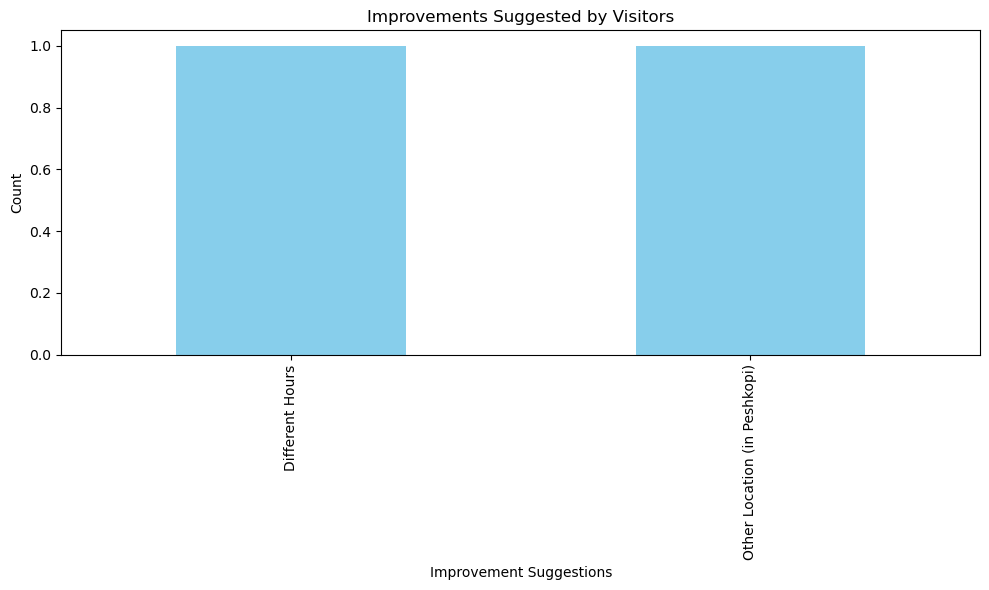

In [13]:
# Bar Chart displaying the count of each unique response in the 'Improvements' column. 

# Step 1: Duplicate the 'Improvements' column to a new Series
improvements_responses = df['Improvements'].copy()

# Step 2: Create a bar chart based on the count of each response
improvements_counts = improvements_responses.value_counts()

# Plot the bar chart
plt.figure(figsize=(18, 4))
improvements_counts.plot(kind='bar', color='skyblue')
plt.title('Improvements Suggested by Visitors')
plt.xlabel('Improvement Suggestions')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

In [14]:
# Resources
# https://realpython.com/python-dash/